## 🤖 Simulación de un Bot de Trading con Eventos Discretos

Este notebook tiene como objetivo explorar y analizar algunos comportamientos de bots de trading mediante simulaciones de eventos discretos. 

Sientace libre de crear nuevos analisis y jugar con los parametros de la simulacion para obtener nuevos resultados, ayudandote del codigo que se brinda en el proyecto


## 🛠️ Importación de librerías y funciones

In [352]:
from bot import TradingBot
from market import *
from analysis import *
from plotter import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## 📦Variables Globales

In [353]:
bot_conservador = {"name": "Conservador", "initial_cash": 1000, "buy_thresh": 0.98, "sell_thresh": 1.02, "fee": 0.005}
bot_agresivo = {"name": "Agresivo", "initial_cash": 1000, "buy_thresh": 0.95, "sell_thresh": 1.05, "fee": 0.005}
bot_tendencia = {"name": "Tendencia", "initial_cash": 10000, "buy_thresh": 0.97, "sell_thresh": 1.03, "fee": 0.005}
gwt_params = {'n_steps':300, 'initial_price':100, 'sigma':1.0, 'mu':0.1, 'seed':None}
bot_config = bot_tendencia
generators = {"Gaussiano": gaussian_walk,"Con Tendencia": gaussian_walk_with_trend,"Geom Brown": geometric_brownian_motion,"Mean Revert": mean_reverting}

## 🔍 Análisis 1: Comparación de estrategias (Conservador vs Agresivo)

**Objetivo:** Comparar dos estrategias de bot para evaluar cuál obtiene mayor ganancia media y menor varianza.

In [354]:
df_conservador = simulate_multiple_runs(bot_conservador, n_runs=10000)
df_agresivo = simulate_multiple_runs(bot_agresivo, n_runs=10000)

resumen = pd.DataFrame({
    "Bot": ["Conservador", "Agresivo"],
    "Ganancia Prom.": [df_conservador["net_worth"].mean(), df_agresivo["net_worth"].mean()],
    "Trades Prom.": [df_conservador["trades"].mean(), df_agresivo["trades"].mean()],
    "Std Dev": [df_conservador["net_worth"].std(), df_agresivo["net_worth"].std()]
})
resumen

,Bot,Ganancia Prom.,Trades Prom.,Std Dev
0,Conservador,978.584699,4.2757,102.966224
1,Agresivo,988.385679,2.3709,115.863411


## **Interpretación:**

El bot agresivo obtiene mayor ganancia promedio, pero su desviación estándar también es más alta. Esto implica mayor riesgo, lo cual puede ser deseable o no según el contexto del mercado.

## Mostrar y Guardar los graficos

[✔] Gráfico guardado en: figures/distribucion_bot.png
Shapiro: (np.float64(0.7711686014318477), np.float64(1.716073010300155e-79))
D'Agostino: (np.float64(3362.7317461664406), np.float64(0.0)) 



/home/glen/Desktop/3ero/simulacion/Trading_Bot_Simulation/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


[✔] Gráfico guardado en: figures/distribucion_bot.png
Shapiro: (np.float64(0.815915849480451), np.float64(8.730094132819193e-75))
D'Agostino: (np.float64(2506.0446940511624), np.float64(0.0))


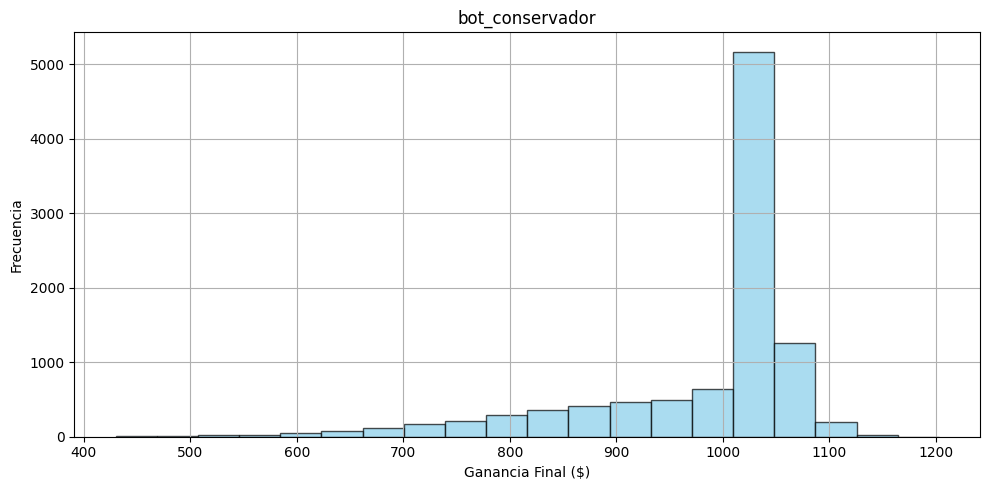

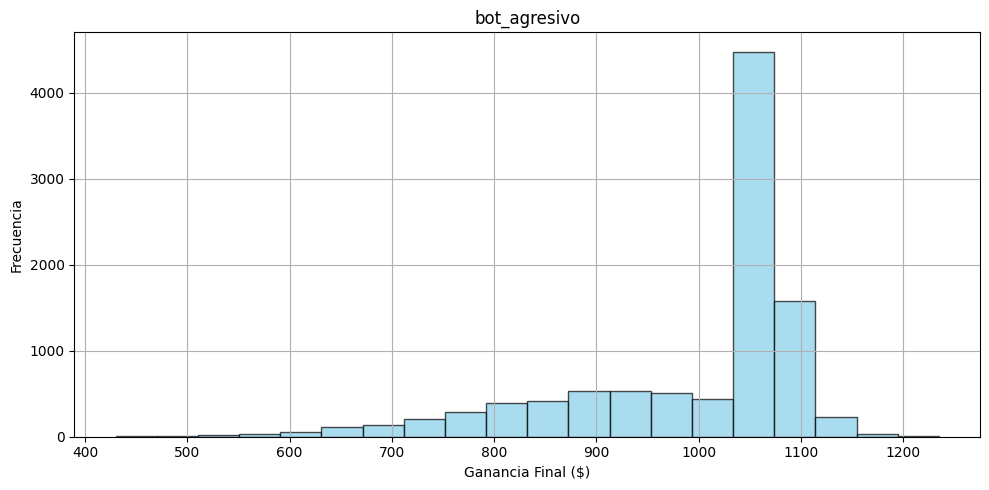

In [355]:
plot_distribution(df_conservador, save_path="figures/distribucion_bot.png", title="bot_conservador")
stats = test_normality(df_conservador)
print("Shapiro:", stats["shapiro"])
print("D'Agostino:", stats["normaltest"], '\n')

df_conservador.to_csv("data/resultados_bot_conservador.csv", index=False)


plot_distribution(df_agresivo, save_path="figures/distribucion_bot.png", title="bot_agresivo")
stats = test_normality(df_agresivo)
print("Shapiro:", stats["shapiro"])
print("D'Agostino:", stats["normaltest"])

df_agresivo.to_csv("data/resultados_bot_agresivo.csv", index=False)


## 🔍 Análisis 2: ¿Influye la tendencia del mercado en el desempeño del bot?

**Objetivo:** Comparar el comportamiento del bot en mercados con y sin tendencia.


🧪 Gaussiano: media net worth = $9803.68
🧪 Con Tendencia: media net worth = $9803.68
🧪 Geom Brown: media net worth = $9949.78
🧪 Mean Revert: media net worth = $9803.68
Comparación entre Gaussiano y Mean-Reverting:
         t_test: stat=0.0000, p-value=1.0000e+00
   mann_whitney: stat=5000.0000, p-value=1.0000e+00
        ks_test: stat=0.0000, p-value=1.0000e+00


/home/glen/Desktop/3ero/simulacion/Trading_Bot_Simulation/plotter.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x="Modelo", y=metric, palette="Set2")


[✔] Guardado en figures/comparacion_modelos_networth.png


/home/glen/Desktop/3ero/simulacion/Trading_Bot_Simulation/plotter.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x="Modelo", y=metric, palette="Set2")


[✔] Guardado en figures/comparacion_modelos_trades.png


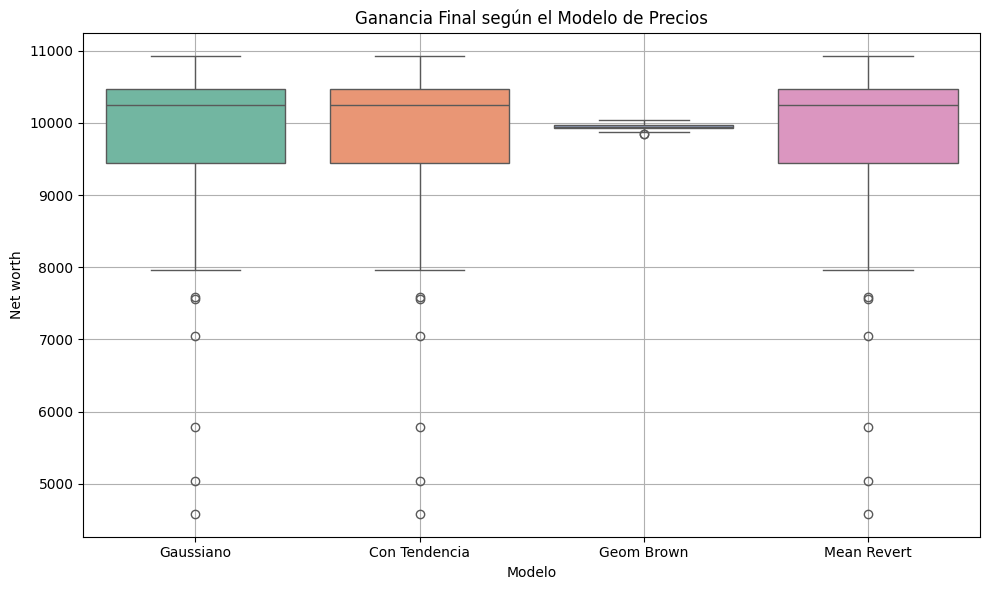

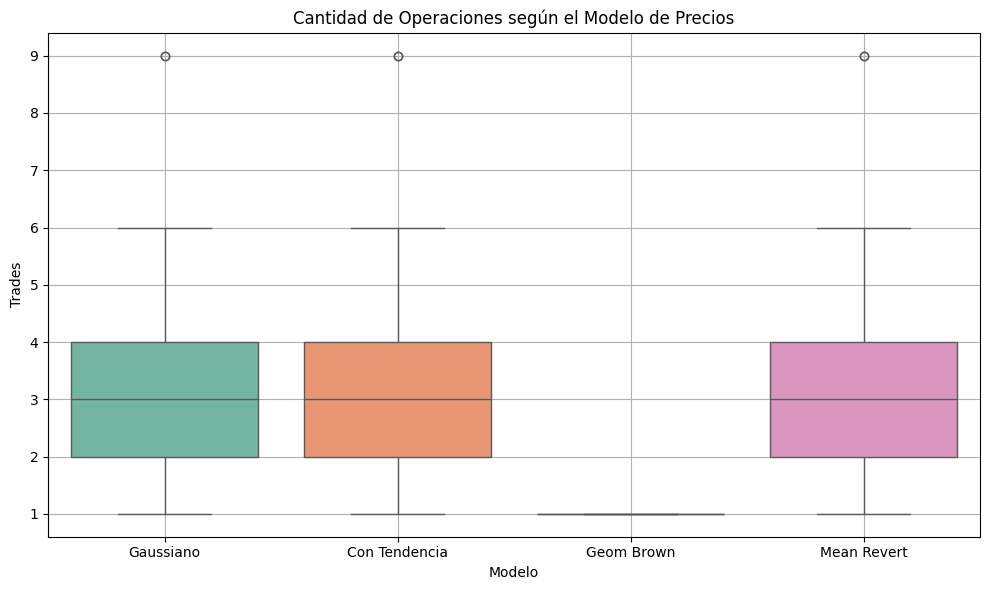

In [356]:
resultados = {}

for nombre, gen_func in generators.items():
    df = simulate_multiple_runs(bot_config, n_runs=100, n_steps=300,
                                sigma=1.0 if nombre != "Geom Brown" else 0.02)
    resultados[nombre] = df
    print(f"🧪 {nombre}: media net worth = ${df['net_worth'].mean():.2f}")


print("Comparación entre Gaussiano y Mean-Reverting:")
result = compare_bots(resultados["Gaussiano"], resultados["Mean Revert"])
for name, (stat, p) in result.items():
    print(f"{name:>15}: stat={stat:.4f}, p-value={p:.4e}")

plot_price_model_comparison(
    resultados_dict=resultados,  # Este diccionario contiene los DataFrames por modelo
    metric="net_worth",
    save_path="figures/comparacion_modelos_networth.png",
    title="Ganancia Final según el Modelo de Precios"
)

plot_price_model_comparison(
    resultados_dict=resultados,
    metric="trades",
    save_path="figures/comparacion_modelos_trades.png",
    title="Cantidad de Operaciones según el Modelo de Precios"
)

## **Interpretación:**



## 🔍 Análisis 3: Estimación de las metricas con Bootstrap

**Objetivo:** Validar y construir un intervalo de confianza para cada una de las metricas del bot.



📈 Métrica: net_worth
    Media bootstrap: 9800.44
    IC 95%: (9556.69, 10015.52)
[✔] Gráfico guardado: figures/bootstrap_net_worth.png

📈 Métrica: trades
    Media bootstrap: 3.03
    IC 95%: (2.69, 3.37)
[✔] Gráfico guardado: figures/bootstrap_trades.png

📈 Métrica: final_cash
    Media bootstrap: 6389.46
    IC 95%: (5424.43, 7320.24)
[✔] Gráfico guardado: figures/bootstrap_final_cash.png

📈 Métrica: final_position
    Media bootstrap: 40.94
    IC 95%: (31.43, 51.85)
[✔] Gráfico guardado: figures/bootstrap_final_position.png


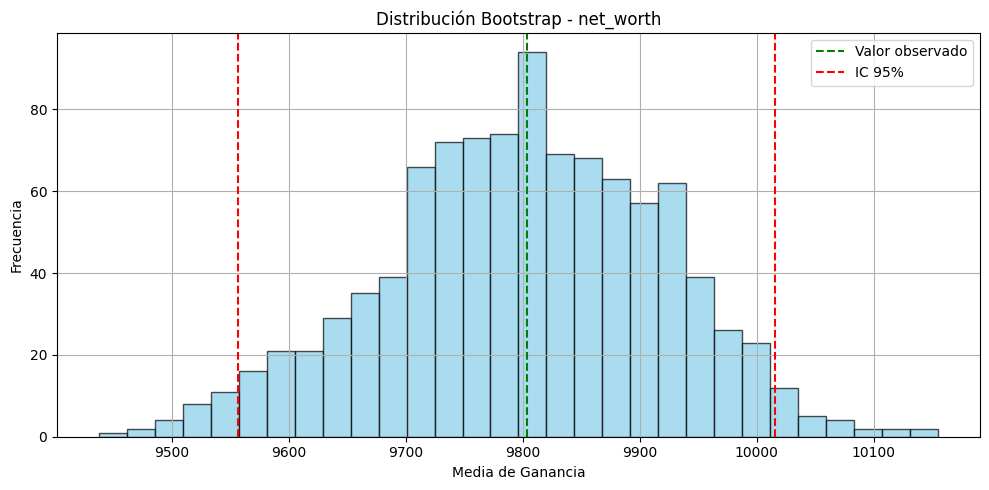

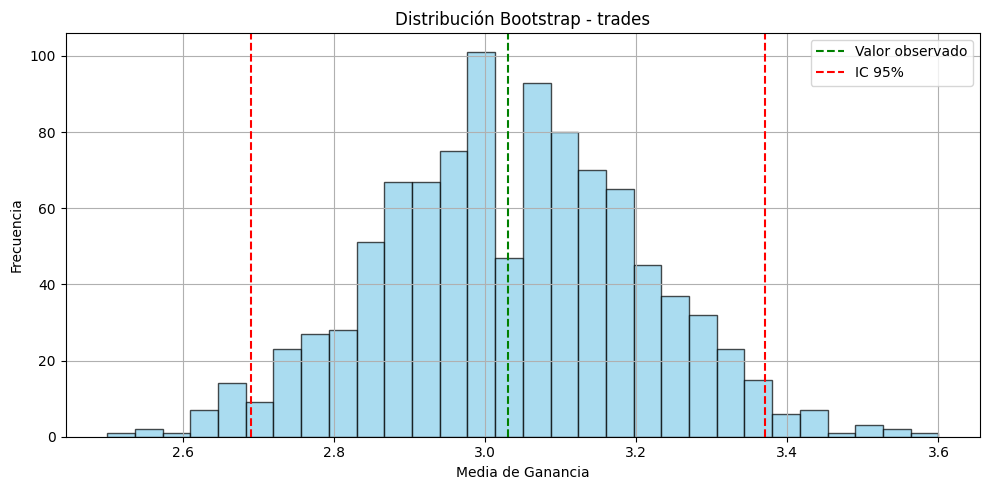

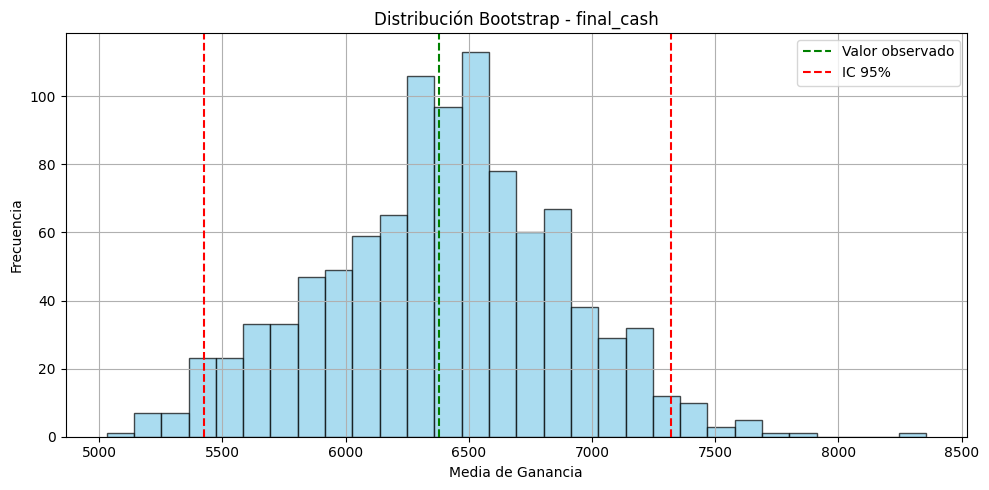

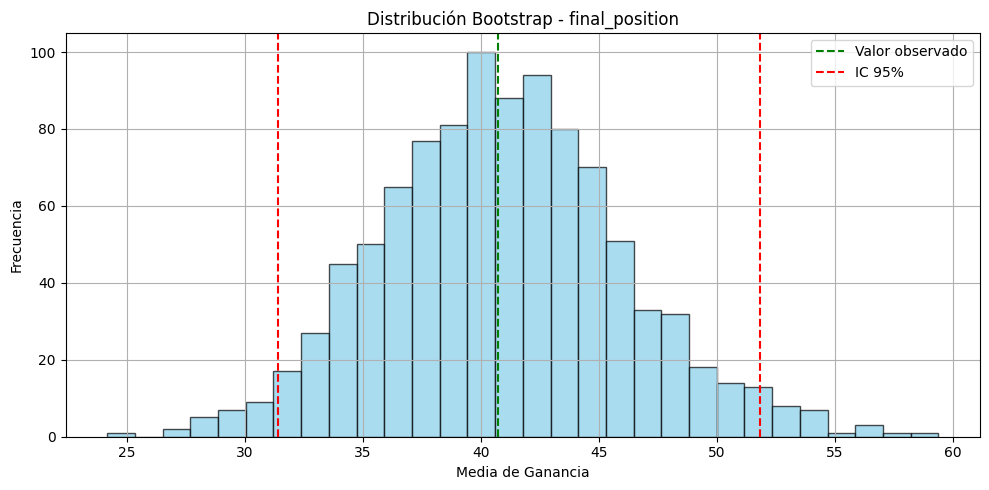

In [357]:
df = simulate_multiple_runs(bot_config, n_runs=100)

# Métricas a analizar con bootstrap
metrics = ["net_worth", "trades", "final_cash", "final_position"]

for metric in metrics:
    media, (low, high), samples = bootstrap_confidence_interval(df[metric].values)
    
    print(f"\n📈 Métrica: {metric}")
    print(f"    Media bootstrap: {media:.2f}")
    print(f"    IC 95%: ({low:.2f}, {high:.2f})")

    plot_bootstrap_distribution(
        samples,
        real_value=df[metric].mean(),
        ci=(low, high),
        save_path=f"figures/bootstrap_{metric}.png",
        title=f"Distribución Bootstrap - {metric}"
    )

## 🔍 Análisis 4: ¿Cuántas simulaciones necesito para estimar con confianza cuánto gana mi bot?

### 🎯 Objetivo:

Simular al bot repetidas veces y detenerse automáticamente cuando el intervalo de confianza para la ganancia promedio sea suficientemente pequeño:

/home/glen/Desktop/3ero/simulacion/Trading_Bot_Simulation/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/glen/Desktop/3ero/simulacion/Trading_Bot_Simulation/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[✔] Simulaciones necesarias: 503
[±] Error final estimado: $99.94
[✔] Gráfico guardado en: figures/distribucion_bot_parada.png


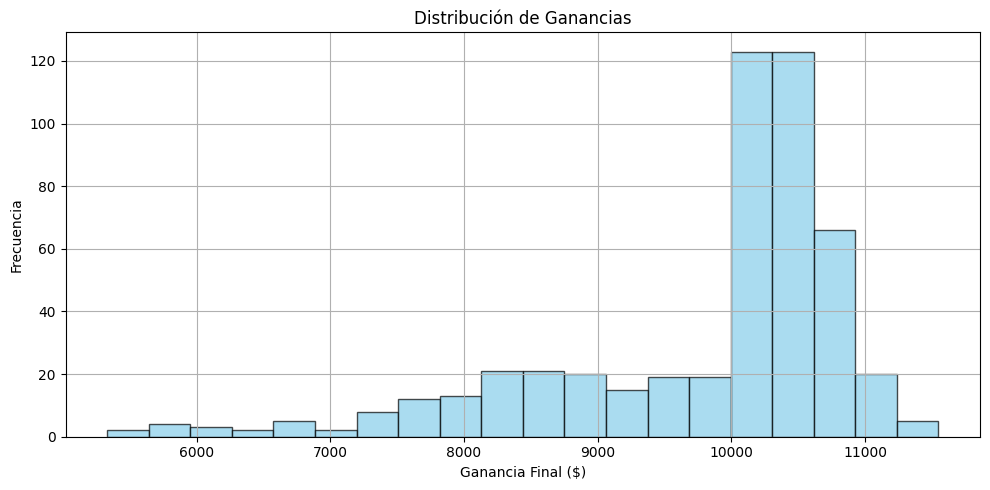

In [358]:
df, final_error, error_trace = simulate_until_confidence(bot_config, d=100)

print(f"[✔] Simulaciones necesarias: {len(df)}")
print(f"[±] Error final estimado: ${final_error:.2f}")

df.to_csv("data/resultados_bot_parada.csv", index=False)
plot_distribution(df, save_path="figures/distribucion_bot_parada.png")

## 🔍 Análisis 5: Comparación entre horizontes (semana, mes, año)
**Objetivo:** Analizar si el desempeño del bot mejora o empeora al cambiar la duración del escenario simulado.


/home/glen/Desktop/3ero/simulacion/Trading_Bot_Simulation/plotter.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x="Modelo", y=metric, palette="Set2")


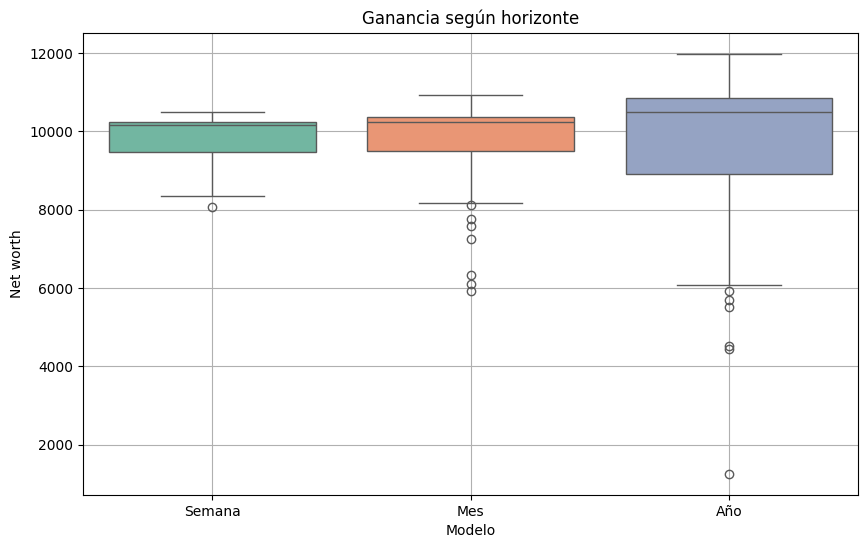

In [359]:
horizontes = {"Semana": 50, "Mes": 200, "Año": 1000}
resultados_h = {}

for nombre, pasos in horizontes.items():
    df = simulate_multiple_runs(bot_tendencia, n_runs=100, n_steps=pasos)
    resultados_h[nombre] = df

plot_price_model_comparison(resultados_h, metric="net_worth", title="Ganancia según horizonte")
